In [2]:
import pandas as pd
import numpy as np
import statistics as stats
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

area2 = 'DK2'
area1 = 'DK1'

fileNameWind = 'wind' + '_'+area1
fileNamePrice = 'price' + '_'+area1
fileNameWind2 = 'wind' + '_'+area2
fileNamePrice2 = 'price' + '_'+area2

data_wind = pd.read_csv("../../../data/data_sanitized/"+fileNameWind+".csv")
data_price = pd.read_csv("../../../data/data_sanitized/"+fileNamePrice+".csv")
data_wind2 = pd.read_csv("../../../data/data_sanitized/"+fileNameWind2+".csv")
data_price2 = pd.read_csv("../../../data/data_sanitized/"+fileNamePrice2+".csv")

In [262]:
data_wind

,date,holiday,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2016-01-01,1,1314.0,1267.0,1159.0,1160.0,1069.0,1013.0,881.0,752.0,578.0,487.0,329.0,209.0,152.0,115.0,119.0,82.0,59.0,94.0,114.0,149.0,192.0,321.0,718.0,932.0
1,2016-01-02,0,1049.0,1226.0,1601.0,1995.0,2225.0,2279.0,2484.0,2655.0,2988.0,2958.0,3025.0,3123.0,3205.0,3223.0,3195.0,3198.0,3200.0,3192.0,3185.0,3166.0,3118.0,3117.0,3028.0,3136.0
2,2016-01-03,1,3144.0,2772.0,3130.0,3128.0,3119.0,3091.0,3090.0,3122.0,3057.0,3064.0,3032.0,3069.0,3146.0,3142.0,3103.0,2969.0,2960.0,2974.0,2970.0,2932.0,2760.0,2808.0,2849.0,2903.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2020-05-10,1,72.0,100.0,151.0,326.0,624.0,799.0,885.0,784.0,863.0,1137.0,1407.0,1673.0,1800.0,2050.0,2391.0,2602.0,2563.0,2320.0,2309.0,2000.0,1810.0,1503.0,1296.0,1411.0
1592,2020-05-11,0,1430.0,1515.0,1733.0,1351.0,1617.0,1204.0,1097.0,1225.0,1543.0,1756.0,1560.0,1265.0,1217.0,1171.0,1355.0,1415.0,1470.0,1505.0,1939.0,1820.0,1416.0,1356.0,1412.0,1504.0
1593,2020-05-12,0,1766.0,1757.0,1828.0,1917.0,1730.0,1676.0,1504.0,1648.0,2231.0,2347.0,2265.0,2222.0,2237.0,2279.0,2362.0,2476.0,2446.0,2447.0,2535.0,2180.0,1695.0,1260.0,994.0,869.0


In [227]:
x = data_wind.loc[:,'0']
y = data_price.loc[:,'0']

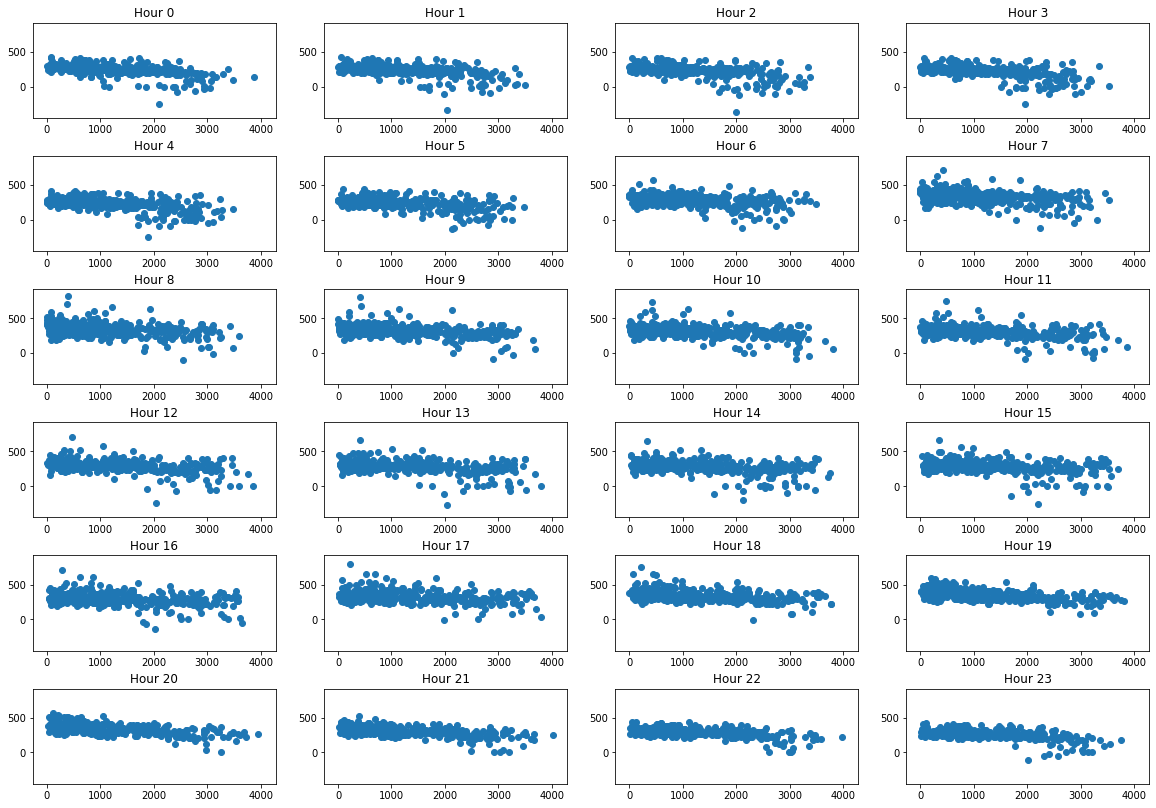

In [268]:
def draw_24_plots(data_wind,data_price, name='Plot', ylabel = 'y lab', global_title='test'):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots(6, 4,sharey=True,sharex=True)
    fig.set_figheight(14)
    fig.set_figwidth(20)
    fig.subplots_adjust(hspace=0.4)
#     st = fig.suptitle(global_title, fontsize="x-large")
#     st.set_y(0.95)
    for i in x_data:
        plot_index =int(i/4),int(i%4)
        ax[plot_index].scatter(data_wind.loc[1097:1461,str(i)],data_price.loc[1097:1461,str(i)])
#             ax[plot_index].plot(new_df.loc[index], label=new_df.loc[index].name[1])
        ax[plot_index].set_title('Hour ' + str(i))
#             # set title and legend
#             ax[plot_index].set_xlabel('Hour')
#             ax[plot_index].set_ylabel(ylabel)
        ax[plot_index].yaxis.set_tick_params(labelleft=True)
        ax[plot_index].xaxis.set_tick_params(labelleft=True)
# plt.scatter(x,y, color='r')
draw_24_plots(data_wind,data_price)

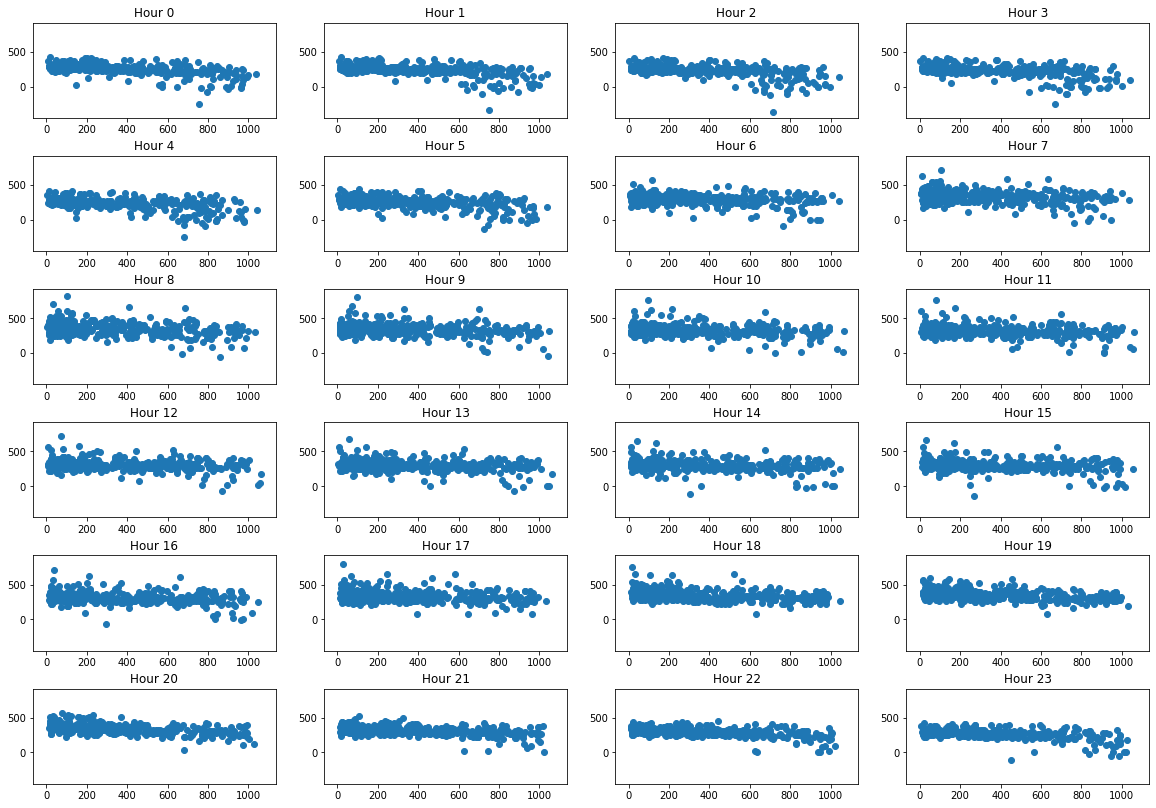

In [269]:

draw_24_plots(data_wind2,data_price2)

In [228]:
stats.pearsonr(x,y)

(-0.42357594394351084, 2.062675239433076e-70)

In [229]:
np.corrcoef(x,y)


array([[ 1.        , -0.42357594],
       [-0.42357594,  1.        ]])

In [230]:
x

0       113.0
1       239.0
2       816.0
        ...  
1591    277.0
1592    590.0
1593    115.0
Name: 0, Length: 1594, dtype: float64

In [264]:
cr = pd.DataFrame.from_records(np.ones((10,24)))
cr['Area'] = ['DK1']*5 + ['DK2']*5
cr['Year'] = ['2016','2017','2018','2019','2020']*2
cr = cr.groupby(['Area','Year']).sum()

year_dict = {'2016':'0:365','2017':'366:730','2018':'731:1096','2019':'1097:1461','2020':'1462:'}


for y in cr.index:
    df_wind = data_wind if y[0] == 'DK1' else data_wind2
    df_price = data_price if y[0] == 'DK1' else data_price2
    for i in range(0,24):
        if y[1] == '2020':
            myslice = slice(year_dict[y[1]].split(':')[0])
        else:
            myslice = slice( *map(int, year_dict[y[1]].split(':') ) )
#         print(stats.pearsonr(data_wind.loc[myslice,str(i)],data_price.loc[myslice,str(i)])[0])
        cr.loc[(y),i] = stats.pearsonr(df_price.loc[myslice,str(i)],df_wind.loc[myslice,str(i)])[0]
cm = ListedColormap(sns.color_palette('Purples_r',20).as_hex())
pd.set_option('precision', 2)
cr = cr.style.background_gradient(cmap=cm,axis=None),,

cr

In [152]:
neg_price = data_price.copy()
neg_price['date']= pd.to_datetime(neg_price['date'],format='%Y-%m-%d')
neg_price['year']=neg_price['date'].dt.year
neg_price = neg_price.drop(columns=['holiday','date'])
neg_price.loc[:,'0':'23'] = neg_price.loc[:,'0':'23'] < 0
neg_price = neg_price.groupby('year').sum().astype(int)
neg_price['Total'] = 0
neg_price.loc['Total',:] = 0

# for k in range(0,24):
neg_price.loc['Total',:] = neg_price.iloc[0:5,:].sum()
neg_price.loc[:,'Total'] = neg_price.loc[:,'0':'23'].sum(axis=1)
neg_price = neg_price.astype(int)
cm = ListedColormap(sns.color_palette('YlGn_r',20).as_hex())
neg_price = neg_price.style.background_gradient(cmap=cm,axis=1,subset=(df.index,df.columns[:-1]))
pd.set_option('display.max_columns', None)
neg_price


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Total
year,,,,,,,,,,,,,,,,,,,,,,,,,
2016,3,5,7,6,4,3,4,2,1,1,0,0,0,1,3,2,2,1,0,0,0,1,0,3,49
2017,4,6,7,6,5,5,5,3,1,1,1,1,1,1,1,1,1,0,0,0,1,2,1,3,57
2018,4,4,5,6,7,6,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,40
2019,7,9,12,13,10,4,4,3,3,2,1,0,1,4,7,5,2,0,0,1,1,1,1,5,96
2020,2,2,3,4,4,3,2,1,1,1,3,2,2,3,4,3,3,1,1,0,0,0,0,1,46
Total,20,26,34,35,30,21,19,10,6,5,5,3,4,9,16,11,8,2,1,1,2,4,2,14,288


In [30]:
df = data_wind.copy()
df = df.drop(columns=['date','holiday'])
df['max'] = df.max(axis=1)
pd.set_option('display.max_columns',20)
d = pd.DataFrame(np.zeros((1, 1)),columns=['max'])
d = d.append(df[['max']])
d = d.reset_index(drop=True)
d = d.drop(d.tail(1).index)
d

,max
0,0.0
1,1314.0
2,3223.0
3,3146.0
4,2899.0
...,...
1589,1715.0
1590,1628.0
1591,636.0
1592,2602.0


In [31]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,max
0,1314.0,1267.0,1159.0,1160.0,1069.0,1013.0,881.0,752.0,578.0,487.0,...,82.0,59.0,94.0,114.0,149.0,192.0,321.0,718.0,932.0,1314.0
1,1049.0,1226.0,1601.0,1995.0,2225.0,2279.0,2484.0,2655.0,2988.0,2958.0,...,3198.0,3200.0,3192.0,3185.0,3166.0,3118.0,3117.0,3028.0,3136.0,3223.0
2,3144.0,2772.0,3130.0,3128.0,3119.0,3091.0,3090.0,3122.0,3057.0,3064.0,...,2969.0,2960.0,2974.0,2970.0,2932.0,2760.0,2808.0,2849.0,2903.0,3146.0
3,2896.0,2886.0,2886.0,2887.0,2899.0,2834.0,2828.0,2738.0,2818.0,2801.0,...,2570.0,2454.0,2445.0,2478.0,2445.0,2484.0,2409.0,2338.0,2290.0,2899.0
4,2257.0,2255.0,2291.0,2296.0,2314.0,2250.0,2289.0,2347.0,2236.0,2174.0,...,2036.0,1875.0,1819.0,1859.0,1793.0,1738.0,1660.0,1524.0,1451.0,2476.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,998.0,1082.0,1084.0,1171.0,1244.0,1317.0,1288.0,921.0,788.0,853.0,...,1299.0,1628.0,1361.0,1257.0,1078.0,858.0,811.0,774.0,740.0,1628.0
1590,636.0,563.0,506.0,459.0,381.0,356.0,286.0,240.0,247.0,236.0,...,230.0,253.0,230.0,175.0,132.0,89.0,70.0,85.0,75.0,636.0
1591,72.0,100.0,151.0,326.0,624.0,799.0,885.0,784.0,863.0,1137.0,...,2602.0,2563.0,2320.0,2309.0,2000.0,1810.0,1503.0,1296.0,1411.0,2602.0
1592,1430.0,1515.0,1733.0,1351.0,1617.0,1204.0,1097.0,1225.0,1543.0,1756.0,...,1415.0,1470.0,1505.0,1939.0,1820.0,1416.0,1356.0,1412.0,1504.0,1939.0


In [37]:
df = data_wind.copy()
d = pd.DataFrame(np.zeros((1, 1)),columns=['23'])
d = d.append(df[['23']])
d = d.reset_index(drop=True)
d = d.drop(d.tail(1).index)
d

,23
0,0.0
1,932.0
2,3136.0
3,2903.0
4,2290.0
...,...
1589,912.0
1590,740.0
1591,75.0
1592,1411.0
